In [136]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [154]:
import csv 

# convert to array
with open('../E-Jeep Data/Ejeep Sept 18.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
data = data[18:] 
    
# remove header
header = data[0]
data = data[1:]

data = data[0:]
print(data[0:2])

# convert to float
for i in range(len(data)):
    data[i][3] = float(data[i][3])
    data[i][4] = float(data[i][4])
    
    timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    data[i] += timelog
    
    # print(data[i])

# convert data to dataframe
df = pd.DataFrame(data, columns = header + ['Month', 'Day', 'Year', 'Hour', 'Minute', 'Second'])
    
# plot
plt.plot([row[4] for row in data], [row[3] for row in data])
plt.show()

[['2023-09-18 04:52:44.00', '2023-09-18 12:52:44.00', '0.0003160238265991211', '14.634736', '121.076293', '3.535533905932737', '60.64281845092773', '3', '0', '0', '0', '-1', '91.24072265625', '93.9473876953125', '11.94986534118652', '1018.12073776826', '0'], ['2023-09-18 04:52:45.00', '2023-09-18 12:52:45.00', '0.5302410125732422', '14.634736', '121.076293', '4.612905477116144', '60.64281840994954', '3.541982508706206', '0', '0', '0.1946807122416395', '-1', '91.24072265625', '93.9473876953125', '11.94986534118652', '296.1881525974027', '0']]


ValueError: 23 columns passed, passed data had 24 columns

In [139]:
df = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Latitude', 'Longitude']]

<Axes: xlabel='Minute', ylabel='Longitude'>

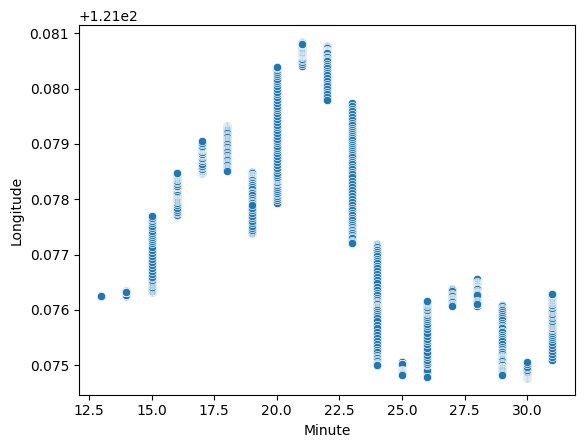

In [141]:
# plotting a scatterplot
sns.scatterplot(x='Minute', y='Longitude', data=df)

<Axes: xlabel='Minute', ylabel='Latitude'>

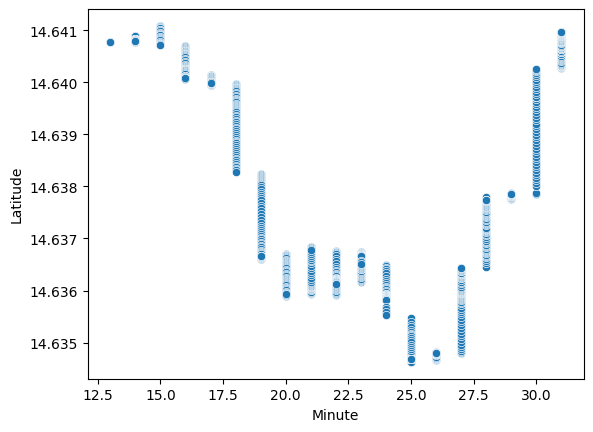

In [142]:
# plotting a scatterplot
sns.scatterplot(x='Minute', y='Latitude', data=df)


In [143]:
X = df[:-1]
Y = df[1:][['Latitude', 'Longitude']]
Y


,Latitude,Longitude
1,14.640777,121.076253
2,14.640777,121.076253
3,14.640777,121.076253
4,14.640777,121.076253
5,14.640777,121.076253
...,...,...
1079,14.640967,121.076274
1080,14.640973,121.076284
1081,14.640974,121.076287
1082,14.640975,121.076288


In [144]:
X, Y

(      Year  Month  Day  Hour  Minute  Second   Latitude   Longitude
 0       23      9   15    17      13      58  14.640777  121.076253
 1       23      9   15    17      13      59  14.640777  121.076253
 2       23      9   15    17      14       0  14.640777  121.076253
 3       23      9   15    17      14       1  14.640777  121.076253
 4       23      9   15    17      14       2  14.640777  121.076253
 ...    ...    ...  ...   ...     ...     ...        ...         ...
 1078    23      9   15    17      31      54  14.640959  121.076261
 1079    23      9   15    17      31      55  14.640967  121.076274
 1080    23      9   15    17      31      56  14.640973  121.076284
 1081    23      9   15    17      31      57  14.640974  121.076287
 1082    23      9   15    17      31      58  14.640975  121.076288
 
 [1083 rows x 8 columns],
        Latitude   Longitude
 1     14.640777  121.076253
 2     14.640777  121.076253
 3     14.640777  121.076253
 4     14.640777  121.076253

In [145]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X, Y)
X, Y
# row = X.iloc[600]
# yhat=model_lr.predict([row])
# print('Predicted: %s' % (yhat))
# print( 'Expected: %s' % (Y.iloc[600]))

(      Year  Month  Day  Hour  Minute  Second   Latitude   Longitude
 0       23      9   15    17      13      58  14.640777  121.076253
 1       23      9   15    17      13      59  14.640777  121.076253
 2       23      9   15    17      14       0  14.640777  121.076253
 3       23      9   15    17      14       1  14.640777  121.076253
 4       23      9   15    17      14       2  14.640777  121.076253
 ...    ...    ...  ...   ...     ...     ...        ...         ...
 1078    23      9   15    17      31      54  14.640959  121.076261
 1079    23      9   15    17      31      55  14.640967  121.076274
 1080    23      9   15    17      31      56  14.640973  121.076284
 1081    23      9   15    17      31      57  14.640974  121.076287
 1082    23      9   15    17      31      58  14.640975  121.076288
 
 [1083 rows x 8 columns],
        Latitude   Longitude
 1     14.640777  121.076253
 2     14.640777  121.076253
 3     14.640777  121.076253
 4     14.640777  121.076253

In [146]:

row = X.iloc[600]
row
# for i in row:
#     print(type(i))

yhat=model_lr.predict([row])
print('Predicted: %s' % (yhat))
print( 'Expected: %s' % (Y.iloc[600]))

Predicted: [[ 14.63656042 121.0772467 ]]
Expected: Latitude      14.636539
Longitude    121.077232
Name: 601, dtype: float64


/Users/cs/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [147]:
# new df for output
df_output = pd.DataFrame(columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Latitude', 'Longitude'])
# df_output = pd.DataFrame(columns = ['Latitude', 'Longitude'])
row = X.iloc[-1]
for i in range(1000):
    yhat = model_lr.predict(row.to_frame().transpose())
    print(yhat)
    next_row = [row[0], row[1], row[2], row[3], row[4], row[5]+1, yhat[0][0], yhat[0][1]]
    if next_row[5] >= 60:
        next_row[5] -= 60
        next_row[4] += 1
    if next_row[4] >= 60:
        next_row[4] -= 60
        next_row[3] += 1
    if next_row[3] >= 24:
        next_row[3] -= 24
        next_row[2] += 1
    if next_row[2] >= 30:
        next_row[2] -= 30
        next_row[1] += 1
    if next_row[1] >= 12:
        next_row[1] -= 12
        next_row[0] += 1
    df_output.loc[len(df_output)] = next_row
    row = df_output.iloc[-1]
    
# df_output

[[ 14.64100182 121.0762931 ]]
[[ 14.64102869 121.07629827]]
[[ 14.64105817 121.07630195]]
[[ 14.64108771 121.07630571]]
[[ 14.64111731 121.07630956]]
[[ 14.64114698 121.07631348]]
[[ 14.64117671 121.07631749]]
[[ 14.6412065  121.07632159]]
[[ 14.64123636 121.07632576]]
[[ 14.64126629 121.07633002]]
[[ 14.64129628 121.07633436]]
[[ 14.64132633 121.07633879]]
[[ 14.64135645 121.0763433 ]]
[[ 14.64138663 121.07634789]]
[[ 14.64141688 121.07635257]]
[[ 14.64144719 121.07635732]]
[[ 14.64147757 121.07636217]]
[[ 14.64150802 121.07636709]]
[[ 14.64153853 121.07637211]]
[[ 14.64156911 121.0763772 ]]
[[ 14.64159975 121.07638238]]
[[ 14.64163046 121.07638764]]
[[ 14.64166124 121.07639299]]
[[ 14.64169208 121.07639842]]
[[ 14.64172299 121.07640394]]
[[ 14.64175397 121.07640954]]
[[ 14.64178501 121.07641522]]
[[ 14.64181612 121.07642099]]
[[ 14.6418473  121.07642685]]
[[ 14.64187854 121.07643279]]
[[ 14.64190986 121.07643881]]
[[ 14.64194124 121.07644492]]
[[ 14.64197269 121.07645112]]
[[ 14.6420

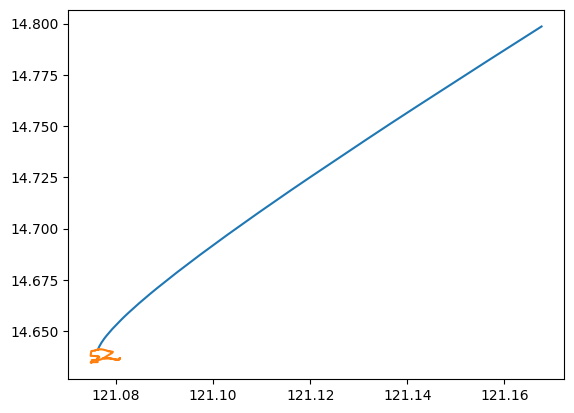

In [148]:
# plot
plt.plot([row for row in df_output['Longitude']], [row for row in df_output['Latitude']])

plt.plot([row[4] for row in data], [row[3] for row in data])
plt.show()

In [149]:
for i in df_output['Latitude']:
    print(type(i), i)
    break

<class 'float'> 14.641001817268497


In [150]:
df_output['Longitude']

0      121.076293
1      121.076298
2      121.076302
3      121.076306
4      121.076310
          ...    
995    121.166496
996    121.166780
997    121.167064
998    121.167350
999    121.167636
Name: Longitude, Length: 1000, dtype: float64